원, 삼각형, 사각형 구분하기

In [1]:
from google.colab import files
up = files.upload()

Saving handwriting_shape.zip to handwriting_shape.zip


In [4]:
!unzip handwriting_shape.zip -d handwriting > /dev/null

In [5]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

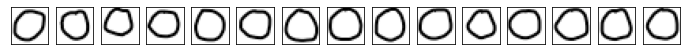

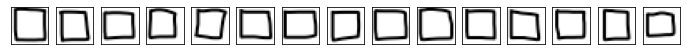

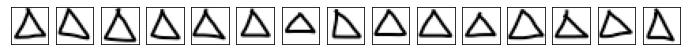

In [9]:
# train datasets
shapes = ["circle", "rectangle", "triangle"]
for shape in shapes:
    dir_name = f"handwriting/train/{shape}"
    plt.figure(figsize = (12,1))
    for i, fname in enumerate(glob(f"{dir_name}/*.png")):
        img = Image.open(fname)
        plt.subplot(1,15, i+1), plt.imshow(img),
        plt.xticks([]), plt.yticks([])
    plt.show()

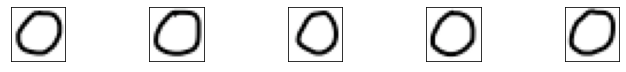

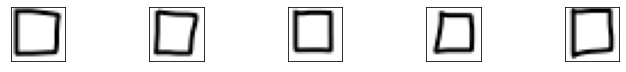

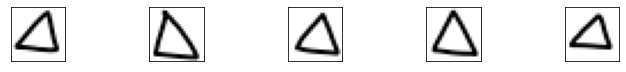

In [10]:
# test datasets
shapes = ["circle", "rectangle", "triangle"]
for shape in shapes:
    dir_name = f"handwriting/test/{shape}"
    plt.figure(figsize = (12,1))
    for i, fname in enumerate(glob(f"{dir_name}/*.png")):
        img = Image.open(fname)
        plt.subplot(1,5, i+1), plt.imshow(img),
        plt.xticks([]), plt.yticks([])
    plt.show()

In [15]:
import numpy as np
import cv2
cv2.imread("handwriting/train/circle/circle001.png")[:,:,::-1].shape

(24, 24, 3)

- 데이터셋 생성하기

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
train_data_generator = train_datagen.flow_from_directory(
    "handwriting/train", target_size=(24,24), batch_size = 3, class_mode = "categorical"
)

Found 45 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale = 1/255.)
test_data_generator = test_datagen.flow_from_directory(
    "handwriting/test", target_size=(24,24), batch_size = 3, class_mode = "categorical"
)

Found 15 images belonging to 3 classes.


In [20]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [22]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정/학습/평가

In [23]:
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [25]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [26]:
model = Sequential([
        Conv2D(32, (3,3), input_shape=(24,24,3), activation = "relu"),
        Conv2D(32, (3,3), activation = "relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation = "relu"),
        Dense(3, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 128)               1638528   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,649,059
Trainable params: 1,649,059
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer = "adam", loss= "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
model.fit(
    train_data_generator, steps_per_epoch =15, epochs = 50,
    validation_data = test_data_generator, validation_steps = 5
)

Epoch 1/50
15/15 [==============================] - 2s 47ms/step - loss: 1.1550 - accuracy: 0.4889 - val_loss: 0.5996 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 1s 35ms/step - loss: 0.1802 - accuracy: 1.0000 - val_loss: 0.3427 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 1s 46ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 32ms/step - loss: 2.4208e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 31ms/step - loss: 2.7612e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 31ms/step - loss: 1.2868e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
E

In [32]:
model.evaluate(test_data_generator, steps = 5)

5/5 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 1.0000


[0.021138764917850494, 1.0]